# Notebook to clean and analyse data

## Setup

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import networkx as nx
import os

In [4]:
# set working directory
root = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [242]:
#load raw data
people = pd.read_csv(os.path.join(root, "data\\scraped\\people.csv"))
planets = pd.read_csv(os.path.join(root, "data\\scraped\\planets.csv"))

In [74]:
people.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,"['http://swapi.dev/api/films/1/', 'http://swap...",[],"['http://swapi.dev/api/vehicles/14/', 'http://...","['http://swapi.dev/api/starships/12/', 'http:/...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,http://swapi.dev/api/planets/1/,"['http://swapi.dev/api/films/1/', 'http://swap...",['http://swapi.dev/api/species/2/'],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,http://swapi.dev/api/people/2/
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,http://swapi.dev/api/planets/8/,"['http://swapi.dev/api/films/1/', 'http://swap...",['http://swapi.dev/api/species/2/'],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,http://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,http://swapi.dev/api/planets/1/,"['http://swapi.dev/api/films/1/', 'http://swap...",[],[],['http://swapi.dev/api/starships/13/'],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,http://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,http://swapi.dev/api/planets/2/,"['http://swapi.dev/api/films/1/', 'http://swap...",[],['http://swapi.dev/api/vehicles/30/'],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,http://swapi.dev/api/people/5/


In [244]:
planets.columns

Index(['name', 'rotation_period', 'orbital_period', 'diameter', 'climate',
       'gravity', 'terrain', 'surface_water', 'population', 'residents',
       'films', 'created', 'edited', 'url'],
      dtype='object')

In [243]:
planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"['http://swapi.dev/api/people/1/', 'http://swa...","['http://swapi.dev/api/films/1/', 'http://swap...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,http://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"['http://swapi.dev/api/people/5/', 'http://swa...","['http://swapi.dev/api/films/1/', 'http://swap...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,http://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],['http://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,http://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],['http://swapi.dev/api/films/2/'],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,http://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,NaN,"swamp, jungles",8,unknown,[],"['http://swapi.dev/api/films/2/', 'http://swap...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,http://swapi.dev/api/planets/5/


## Prepare people

### get individual column for films

In [75]:
#get dummy columns for each film
people["episode 1"] = [1 if x == True else None for x in people["films"].str.contains("4")]
people["episode 2"] = [2 if x == True else None for x in people["films"].str.contains("5")]
people["episode 3"] = [3 if x == True else None for x in people["films"].str.contains("6")]
people["episode 4"] = [4 if x == True else None for x in people["films"].str.contains("1")]
people["episode 5"] = [5 if x == True else None for x in people["films"].str.contains("2")]
people["episode 6"] = [6 if x == True else None for x in people["films"].str.contains("3")]

In [76]:
#convert films to lists (literal string to list)
people["films"] = [literal_eval(x) for x in people["films"]]

# total film appearance
people["no films"] = [len(x) for x in people["films"]]

In [89]:
## create role id to map later according by film appearance
people = people.sort_values(by="no films")
people["people id"] = range(0, len(people))

## Convert data types

In [186]:
# height
people["DV_height"] = people["height"]
people["DV_height"] = [None if x == "unknown" else int(x) for x in people["DV_height"]]

In [193]:
# mass
people["DV_mass"] = people["mass"]
people["DV_mass"] = people["DV_mass"].str.replace(",", "")
people["DV_mass"] = [None if x == "unknown" else float(x) for x in people["DV_mass"]]

## merge planets and people

In [246]:
df = pd.merge(people, planets[['name', 'rotation_period', 'orbital_period', 'diameter', 'climate',
       'gravity', 'terrain', 'surface_water', 'population', 'url']], left_on=people["homeworld"], right_on="url", how='left')


In [251]:
df = df.rename(columns={"name_y":"planet name", "name_x": "name"})

In [252]:
df.columns

Index(['url', 'name', 'height', 'mass', 'hair_color', 'skin_color',
       'eye_color', 'birth_year', 'gender', 'homeworld', 'films', 'species',
       'vehicles', 'starships', 'created', 'edited', 'url_x', 'planet name',
       'rotation_period', 'orbital_period', 'diameter', 'climate', 'gravity',
       'terrain', 'surface_water', 'population', 'url_y'],
      dtype='object')

## Display

### film appearance

In [235]:
#prepare data
chart1 = people[["name", "people id",'episode 1']].dropna().rename(columns={"episode 1": "episode"})
chart2 = people[["name", "people id",'episode 2']].dropna().rename(columns={"episode 2": "episode"})
chart3 = people[["name", "people id",'episode 3']].dropna().rename(columns={"episode 3": "episode"})
chart4 = people[["name", "people id",'episode 4']].dropna().rename(columns={"episode 4": "episode"})
chart5 = people[["name", "people id",'episode 5']].dropna().rename(columns={"episode 5": "episode"})
chart6 = people[["name", "people id",'episode 6']].dropna().rename(columns={"episode 6": "episode"})

#combine into one table
chart = pd.concat([chart1, chart2, chart3, chart4, chart5, chart6])

#map names of episodes
chart["episode"] = chart["episode"].astype(int)
episode_names = {1: "1: The Phantom Menace", 2: "2: Attack of the Clones", 3: "3: Revenge of the Sith", 
                 4: "4: A New Hope", 5: "5: The Empire Strikes Back", 6: "6: Return of the Jedi"}

chart["episode name"] = chart["episode"].map(episode_names)

#save output
chart.to_csv(os.path.join(root, "data\\processed\\people-by-film-appearance.csv"), index=False)

([<matplotlib.axis.YTick at 0x294647bba90>,
 [Text(0, 0, 'Quarsh Panaka'),
  Text(0, 1, 'Wat Tambor'),
  Text(0, 2, 'San Hill'),
  Text(0, 3, 'Grievous'),
  Text(0, 4, 'Tarfful'),
  Text(0, 5, 'Cliegg Lars'),
  Text(0, 6, 'Qui-Gon Jinn'),
  Text(0, 7, 'Tion Medon'),
  Text(0, 8, 'Wicket Systri Warrick'),
  Text(0, 9, 'Jocasta Nu'),
  Text(0, 10, 'Biggs Darklighter'),
  Text(0, 11, 'Bossk'),
  Text(0, 12, 'R5-D4'),
  Text(0, 13, 'Lobot'),
  Text(0, 14, 'Nien Nunb'),
  Text(0, 15, 'Mon Mothma'),
  Text(0, 16, 'Arvel Crynyd'),
  Text(0, 17, 'Greedo'),
  Text(0, 18, 'Jek Tono Porkins'),
  Text(0, 19, 'IG-88'),
  Text(0, 20, 'Taun We'),
  Text(0, 21, 'Ackbar'),
  Text(0, 22, 'Dexter Jettster'),
  Text(0, 23, 'Roos Tarpals'),
  Text(0, 24, 'Rugor Nass'),
  Text(0, 25, 'Ric Olié'),
  Text(0, 26, 'Sebulba'),
  Text(0, 27, 'Darth Maul'),
  Text(0, 28, 'Lama Su'),
  Text(0, 29, 'Ratts Tyerel'),
  Text(0, 30, 'Dud Bolt'),
  Text(0, 31, 'Gasgano'),
  Text(0, 32, 'Bib Fortuna'),
  Text(0, 33, 'Yara

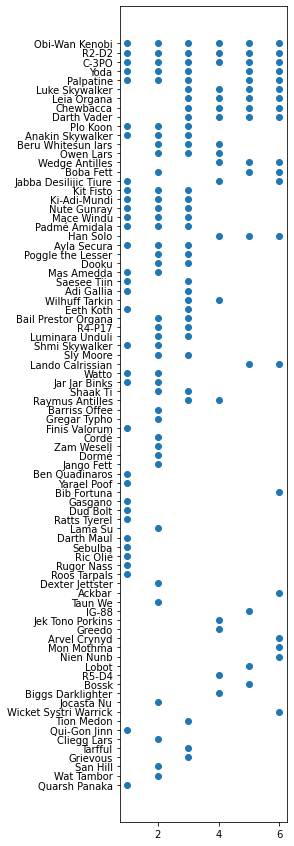

In [146]:
x = chart["episode"]
y = chart["people id"]
labels = chart[["people id", "name"]].drop_duplicates().sort_values(by="people id")["name"]

fig = plt.figure(figsize=(3,15))
plt.scatter(x, y)

plt.yticks(range(0,82), labels)

In [236]:
chart

,name,people id,episode,episode name
40,Quarsh Panaka,0,1,1: The Phantom Menace
30,Qui-Gon Jinn,6,1,1: The Phantom Menace
35,Roos Tarpals,23,1,1: The Phantom Menace
36,Rugor Nass,24,1,1: The Phantom Menace
37,Ric Olié,25,1,1: The Phantom Menace
...,...,...,...,...
19,Palpatine,77,6,6: Return of the Jedi
18,Yoda,78,6,6: Return of the Jedi
1,C-3PO,79,6,6: Return of the Jedi
2,R2-D2,80,6,6: Return of the Jedi


### film appearance network analysis

In [238]:
#get edges from data
edges = list(zip(chart["name"], chart["episode name"]))
                 
#get nodes
nodes = pd.concat([chart["name"], chart["episode name"]])
nodes = nodes.drop_duplicates().reset_index(drop=True)

## build graph
G = nx.Graph()

# add edges
G.add_edges_from(edges)

# add nodes
G.add_nodes_from(nodes)

#print info about graph
print(nx.info(G))

Graph with 88 nodes and 162 edges


(-1.1966080159423673,
 1.0690653106315793,
 -0.875237245513945,
 1.1148636795866809)

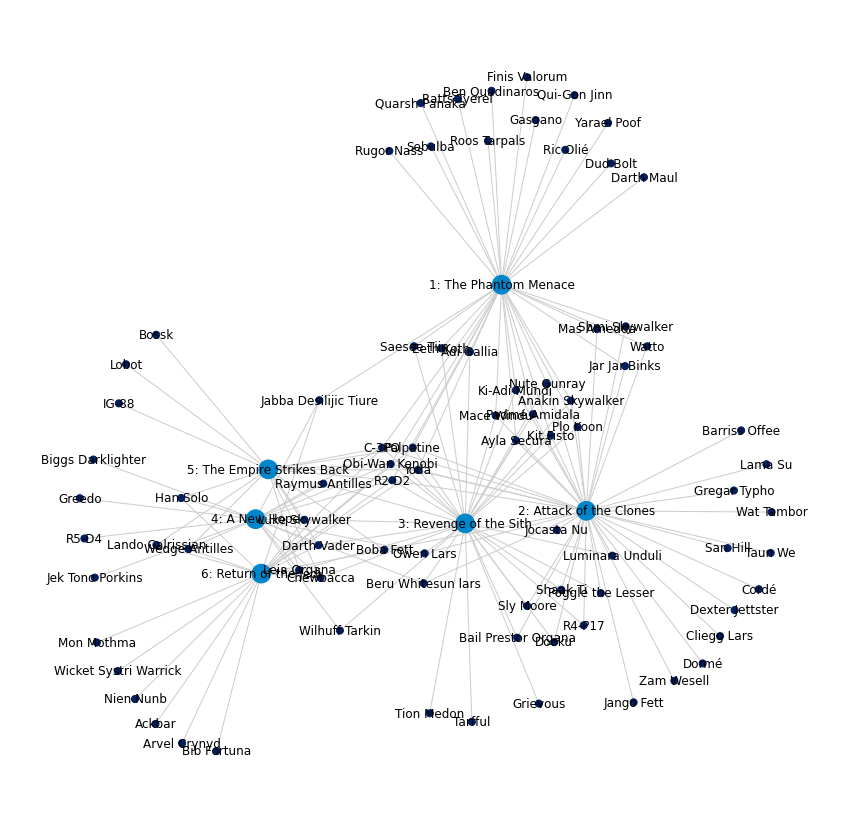

In [241]:
# get unique list of teams (funders)
episodes = chart["episode name"].drop_duplicates().to_list()

#define labels
labels = {}    
for node in G.nodes():
    if node in episodes:
        #set the node name as the key and the label as its value 
        labels[node] = node

#define layout and input for graph
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)

#define node colours and sizes 
#node_color = [(0.1, 0.2, 0.5) if v in teams else (0.1, 0.2, 0.5) for v in G.nodes()]
node_color = [ '#0085ca'  if v in episodes else '#001e60' for v in G.nodes()]
node_size =  [350 if v in episodes else 50 for v in G.nodes()]

plt.figure(figsize=(15,15))

#draw graph without labels
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color= node_color,
                 node_size=node_size,
                 edge_color = '0.8')

#Now only add labels to the nodes you require (the hubs in my case)
#nx.draw_networkx_labels(G,pos,labels,font_size=13, font_color='k')

plt.axis('off')

### Height

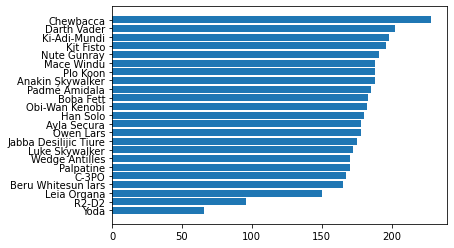

In [189]:
filter = people["no films"] > 2
data = people[filter].sort_values("DV_height", ascending=True)

height = data["DV_height"]
labels = data["name"]
plt.yticks(range(len(height)), labels)
plt.barh(range(len(height)), height) 
plt.show()

## Mass

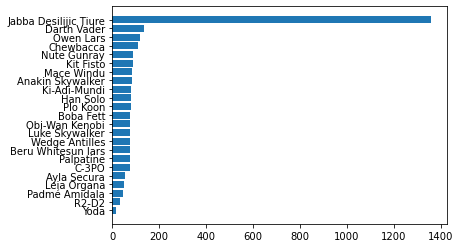

In [194]:
filter = people["no films"] > 2
data = people[filter].sort_values("DV_mass", ascending=True)

height = data["DV_mass"]
labels = data["name"]
plt.yticks(range(len(height)), labels)
plt.barh(range(len(height)), height) 
plt.show()

## Weight by mass

Text(2    40.0
Name: DV_mass, dtype: float64, 2    96.0
Name: DV_height, dtype: float64, 'R2-D2')

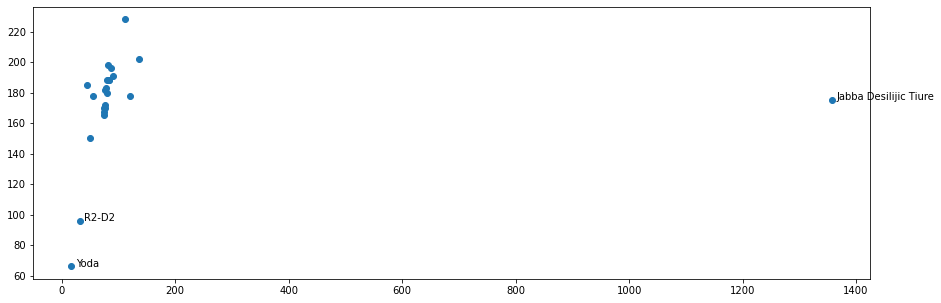

In [212]:
filter = people["no films"] > 2
data = people[filter][["DV_mass", "DV_height", "name"]]

x = data["DV_mass"]
y = data["DV_height"]
labels = data["name"]

fig = plt.figure(figsize=(15,5))
plt.scatter(x, y)

#add labels
plt.text(x=data[data["name"]=="Jabba Desilijic Tiure"]["DV_mass"]+8, 
         y=data[data["name"]=="Jabba Desilijic Tiure"]["DV_height"], 
         s="Jabba Desilijic Tiure")

plt.text(x=data[data["name"]=="Yoda"]["DV_mass"]+8, 
         y=data[data["name"]=="Yoda"]["DV_height"], 
         s="Yoda")

plt.text(x=data[data["name"]=="R2-D2"]["DV_mass"]+8, 
         y=data[data["name"]=="R2-D2"]["DV_height"], 
         s="R2-D2")

## homeworlds

In [264]:
input1 = df[filter]["name"]
input2 = df[filter]["planet name"]

#get edges from data
edges = list(zip(input1, input2))
                 
#get nodes
nodes = pd.concat([input1, input2])
nodes = nodes.drop_duplicates().reset_index(drop=True)

## build graph
G = nx.Graph()

# add edges
G.add_edges_from(edges)

# add nodes
G.add_nodes_from(nodes)

#print info about graph
print(nx.info(G))

Graph with 38 nodes and 23 edges


<ipython-input-264-96bc525edc8c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input1 = df[filter]["name"]
<ipython-input-264-96bc525edc8c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input2 = df[filter]["planet name"]


<ipython-input-267-3920d14290a3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  planets = df[filter]["planet name"].drop_duplicates().to_list()


(-1.2053639654334527,
 1.1612112552758584,
 -1.17740969591829,
 1.1432199572869353)

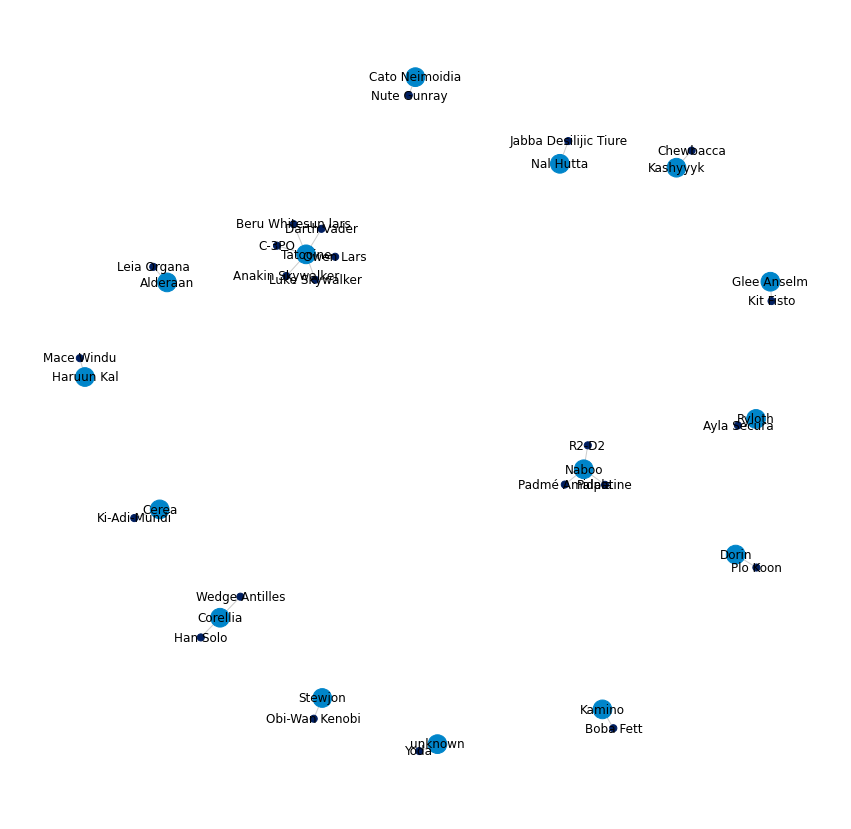

In [267]:
#get planet names
planets = df[filter]["planet name"].drop_duplicates().to_list()

#define labels
labels = {}    
for node in G.nodes():
    if node in planets:
        #set the node name as the key and the label as its value 
        labels[node] = node

#define layout and input for graph
pos = nx.spring_layout(G)
#betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)

#define node colours and sizes 
#node_color = [(0.1, 0.2, 0.5) if v in teams else (0.1, 0.2, 0.5) for v in G.nodes()]
node_color = [ '#0085ca'  if v in planets else '#001e60' for v in G.nodes()]
node_size =  [350 if v in planets else 50 for v in G.nodes()]

plt.figure(figsize=(15,15))

#draw graph
nx.draw_networkx(G, 
                 pos=pos, 
                 with_labels=True,
                 node_color= node_color,
                 node_size=node_size,
                 edge_color = '0.8')

#Now only add labels to the nodes you require (the hubs in my case)
#nx.draw_networkx_labels(G,pos,labels,font_size=13, font_color='k')

plt.axis('off')